In [1]:
# Build a prediction model for Salary_hike

ye.sh <- read.csv(file.choose()) # choose the Salary_Data data set

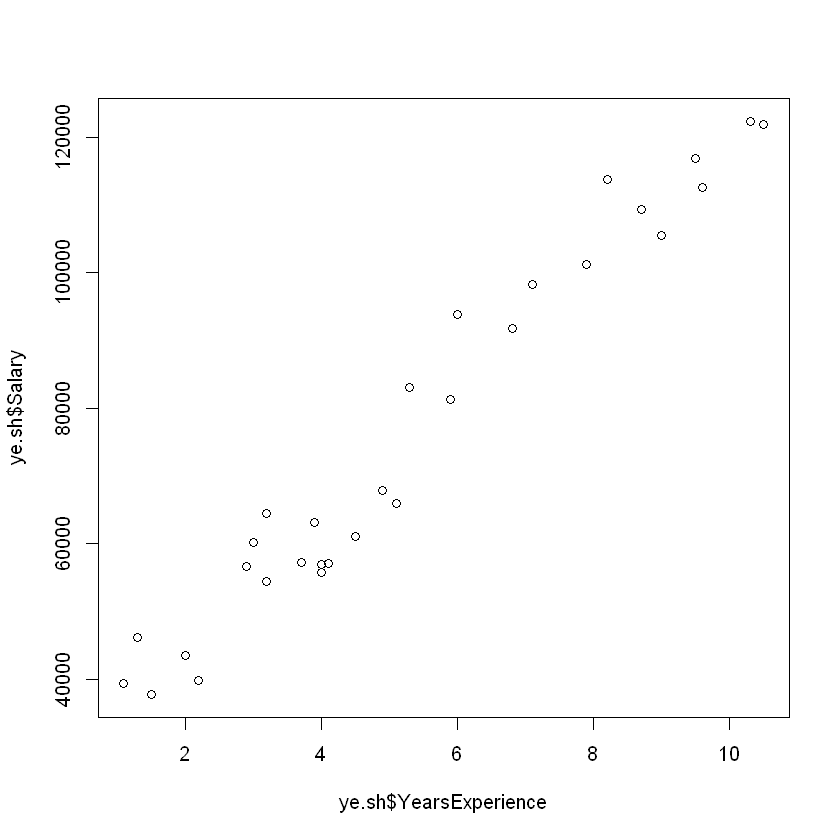

In [2]:
# Scatter Diagram (Plot x,y)
plot(ye.sh$YearsExperience,ye.sh$Salary)

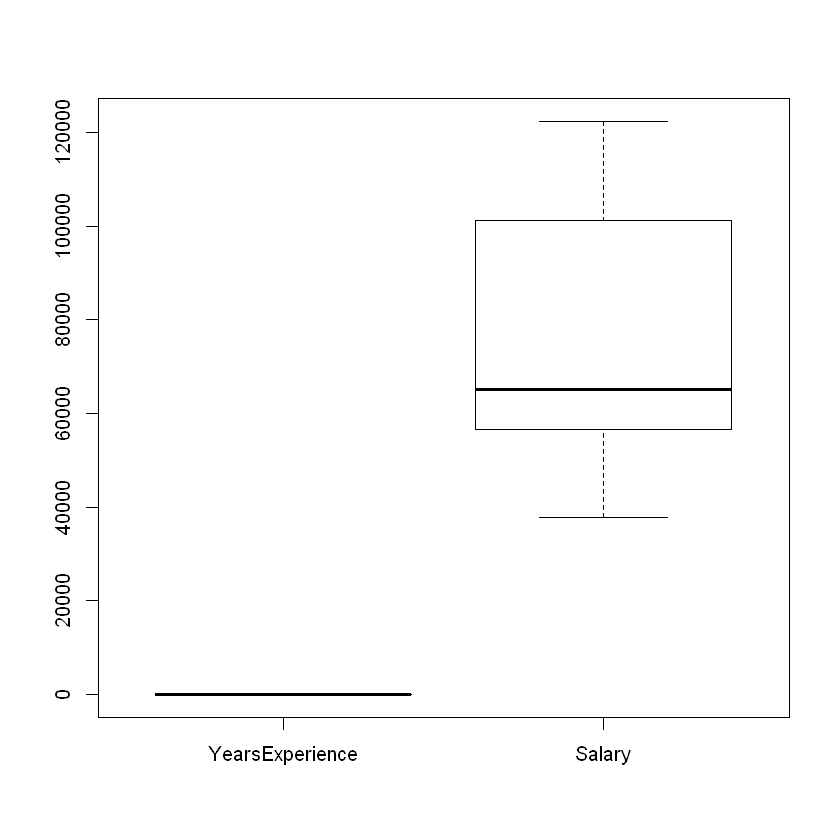

In [3]:
# Other Exploratory data analysis and Plots

boxplot(ye.sh)

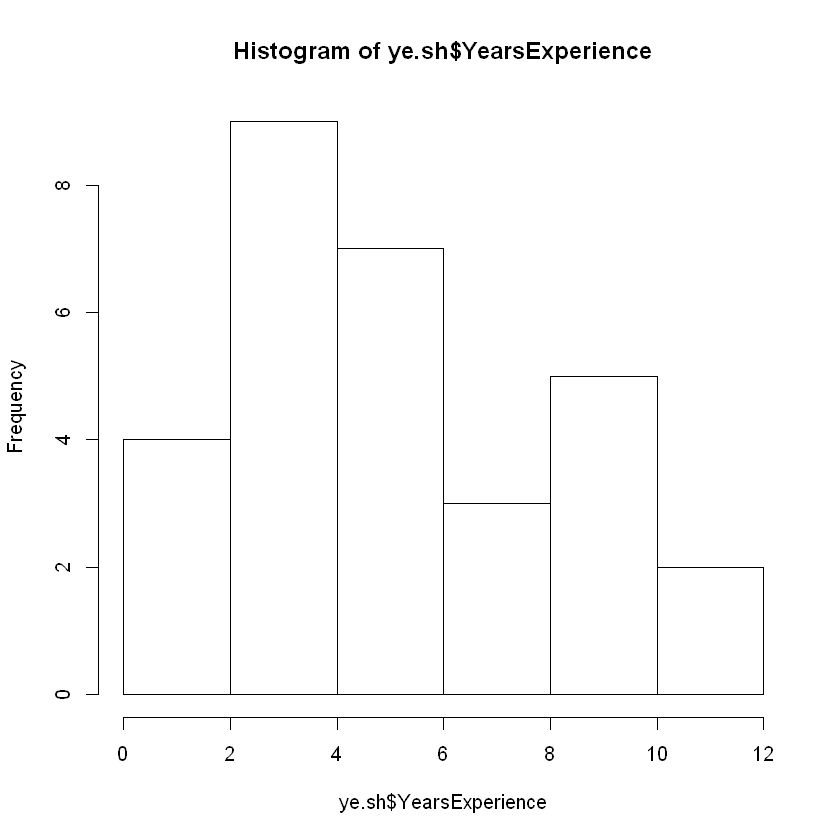

In [4]:
hist(ye.sh$YearsExperience)


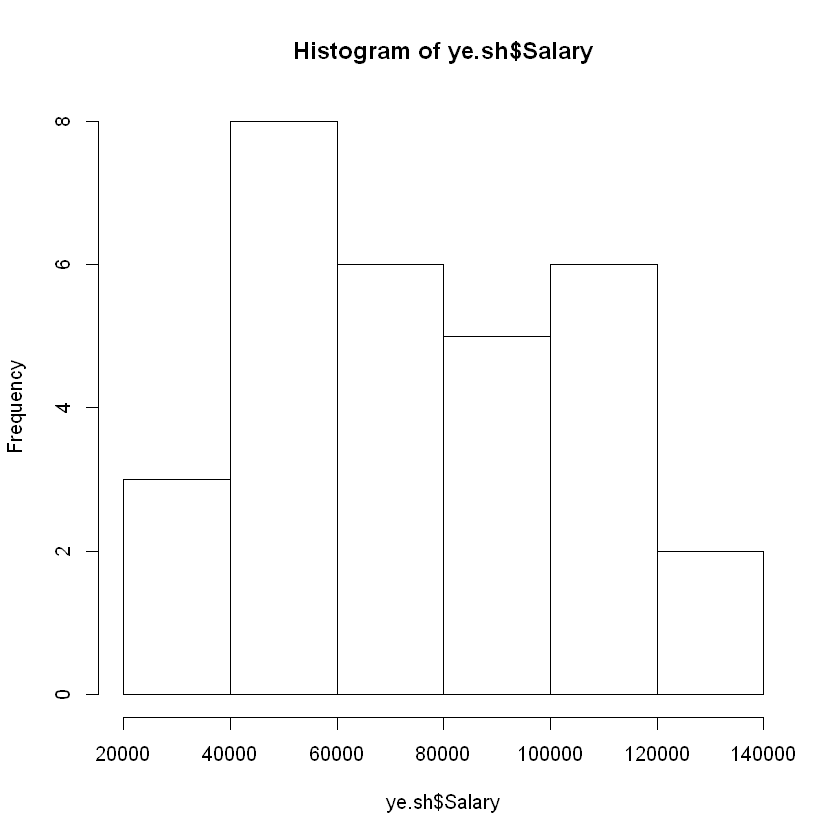

In [5]:
hist(ye.sh$Salary)


In [6]:
summary(ye.sh)


 YearsExperience      Salary      
 Min.   : 1.100   Min.   : 37731  
 1st Qu.: 3.200   1st Qu.: 56721  
 Median : 4.700   Median : 65237  
 Mean   : 5.313   Mean   : 76003  
 3rd Qu.: 7.700   3rd Qu.:100545  
 Max.   :10.500   Max.   :122391  

In [7]:
# Correlation coefficient value for Years of Experience and Employee Salary Hike
ye<- ye.sh$YearsExperience
sh <- ye.sh$Salary
cor(ye,sh)

[1] 0.9782416

In [8]:
# If |r| is greater than  0.85 then Co-relation is Strong(Correlation Co-efficient = 0.9782416). 
# This has a strong Positive Correlation 

# Simple model without using any transformation
reg<-lm(sh~ye)
summary(reg)



Call:
lm(formula = sh ~ ye)

Residuals:
    Min      1Q  Median      3Q     Max 
-7958.0 -4088.5  -459.9  3372.6 11448.0 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  25792.2     2273.1   11.35 5.51e-12 ***
ye            9450.0      378.8   24.95  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5788 on 28 degrees of freedom
Multiple R-squared:  0.957,	Adjusted R-squared:  0.9554 
F-statistic: 622.5 on 1 and 28 DF,  p-value: < 2.2e-16


In [9]:
# Probability value should be less than 0.05(5.51e-12)
# The multiple-R-Squared Value is 0.957 which is greater than 0.8(In General)
# Adjusted R-Squared Value is 0.9554 
# The Probability Value for F-Statistic is 2.2e-16(Overall Probability Model is also less than 0.05)
confint(reg,level = 0.95) # confidence interval

,2.5 %,97.5 %
(Intercept),21136.061,30448.34
ye,8674.119,10225.81


In [10]:
# The above code will get you 2 equations 
# 1 to caliculate the lower range and other for upper range

# Function to Predict the above model 
predict(reg,interval="predict")

Warning message in predict.lm(reg, interval = "predict"):
"predictions on current data refer to _future_ responses
"

fit,lwr,upr
36187.16,23698.92,48675.40
38077.15,25628.63,50525.67
39967.14,27556.52,52377.76
44692.12,32368.22,57016.03
46582.12,34289.64,58874.59
53197.09,40999.70,65394.48
54142.09,41956.37,66327.80
56032.08,43868.25,68195.91
56032.08,43868.25,68195.91
60757.06,48639.42,72874.70


In [11]:
# predict(reg,type="prediction")
# Adjusted R-squared value for the above model is 0.9554 

# we may have to do transformation of variables for better R-squared value
# Applying transformations

# Logarthmic transformation
reg_log<-lm(sh~log(ye))  # Regression using logarthmic transformation
summary(reg_log)


Call:
lm(formula = sh ~ log(ye))

Residuals:
     Min       1Q   Median       3Q      Max 
-15392.6  -7523.0    559.7   6336.1  20629.8 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    14928       5156   2.895  0.00727 ** 
log(ye)        40582       3172  12.792 3.25e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 10660 on 28 degrees of freedom
Multiple R-squared:  0.8539,	Adjusted R-squared:  0.8487 
F-statistic: 163.6 on 1 and 28 DF,  p-value: 3.25e-13


In [12]:
confint(reg_log,level=0.95)

,2.5 %,97.5 %
(Intercept),4365.921,25490.02
log(ye),34083.512,47080.46


In [13]:
predict(reg_log,interval="predict")

Warning message in predict.lm(reg_log, interval = "predict"):
"predictions on current data refer to _future_ responses
"

fit,lwr,upr
18795.85,-5225.823,42817.52
25575.24,1946.237,49204.23
31382.55,8054.979,54710.13
43057.26,20232.824,65881.70
46925.14,24235.859,69614.42
58136.05,35746.140,80525.96
59511.84,37149.017,81874.67
62130.94,39813.758,84448.13
62130.94,39813.758,84448.13
68022.72,45779.622,90265.82


In [14]:
# Multiple R-squared value for the above model is 0.8539
# Adjusted R-squared:  0.8487 

# we may have to do different transformation for a better R-squared value
# Applying different transformations

# Exponential model 
reg_exp<-lm(log(sh)~ye) # regression using Exponential model
summary(reg_exp)


Call:
lm(formula = log(sh) ~ ye)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.18949 -0.06946 -0.01068  0.06932  0.19029 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 10.507402   0.038443  273.33   <2e-16 ***
ye           0.125453   0.006406   19.59   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.09789 on 28 degrees of freedom
Multiple R-squared:  0.932,	Adjusted R-squared:  0.9295 
F-statistic: 383.6 on 1 and 28 DF,  p-value: < 2.2e-16


In [15]:
confint(reg_exp,level=0.95)

,2.5 %,97.5 %
(Intercept),10.4286558,10.5861480
ye,0.1123316,0.1385742


In [16]:
exp(predict(reg_exp,interval="predict"))

Warning message in predict.lm(reg_exp, interval = "predict"):
"predictions on current data refer to _future_ responses
"

fit,lwr,upr
41998.96,34002.70,51875.66
43066.07,34890.07,53158.00
44160.29,35799.49,54473.71
47019.03,38172.93,57915.09
48213.69,39163.64,59355.04
52639.14,42827.23,64699.01
53303.68,43376.45,65502.87
54658.01,44495.02,67142.31
54658.01,44495.02,67142.31
58196.33,47412.46,71432.97


In [17]:
# Multiple R-squared value - 0.932
# Adjusted R SQuare Value - 0.9295 
# Higher the R-sqaured value - Better chances of getting good model 
# for Salary hike and Years of Experience

# Quadratic model
ye.sh[,"ye_sq"] = ye*ye

# Quadratic model
quad_mod <- lm(sh~ye+I(ye^2),data=ye.sh)
summary(quad_mod)


Call:
lm(formula = sh ~ ye + I(ye^2), data = ye.sh)

Residuals:
   Min     1Q Median     3Q    Max 
 -7835  -4026   -493   3309  11579 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 26214.93    4554.67   5.756 4.04e-06 ***
ye           9259.28    1811.01   5.113 2.25e-05 ***
I(ye^2)        16.39     152.12   0.108    0.915    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5893 on 27 degrees of freedom
Multiple R-squared:  0.957,	Adjusted R-squared:  0.9538 
F-statistic: 300.3 on 2 and 27 DF,  p-value: < 2.2e-16


In [18]:
confint(quad_mod,level=0.95)

,2.5 %,97.5 %
(Intercept),16869.5127,35560.3527
ye,5543.4050,12975.1628
I(ye^2),-295.7344,328.5195


In [19]:
predict(quad_mod,interval="predict")

Warning message in predict.lm(quad_mod, interval = "predict"):
"predictions on current data refer to _future_ responses
"

fit,lwr,upr
36419.98,22934.59,49905.37
38279.71,25011.39,51548.02
40140.74,27059.48,53222.00
44799.07,32066.85,57531.29
46664.70,34030.20,59299.19
53204.72,40764.58,65644.86
54140.32,41712.88,66567.76
56012.50,43601.83,68423.18
56012.50,43601.83,68423.18
60698.70,48290.87,73106.53


In [20]:
# Adjusted R-Squared = 0.9538 
#Multiple R -Squared Value = 0.957

# Quadratic model
qd_model <- lm(sh~ye+ye_sq,data=ye.sh)
summary(qd_model)


Call:
lm(formula = sh ~ ye + ye_sq, data = ye.sh)

Residuals:
   Min     1Q Median     3Q    Max 
 -7835  -4026   -493   3309  11579 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 26214.93    4554.67   5.756 4.04e-06 ***
ye           9259.28    1811.01   5.113 2.25e-05 ***
ye_sq          16.39     152.12   0.108    0.915    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5893 on 27 degrees of freedom
Multiple R-squared:  0.957,	Adjusted R-squared:  0.9538 
F-statistic: 300.3 on 2 and 27 DF,  p-value: < 2.2e-16


In [21]:
confint(quad_mod,level=0.95)

,2.5 %,97.5 %
(Intercept),16869.5127,35560.3527
ye,5543.4050,12975.1628
I(ye^2),-295.7344,328.5195


In [22]:
predict(quad_mod,interval="predict")

Warning message in predict.lm(quad_mod, interval = "predict"):
"predictions on current data refer to _future_ responses
"

fit,lwr,upr
36419.98,22934.59,49905.37
38279.71,25011.39,51548.02
40140.74,27059.48,53222.00
44799.07,32066.85,57531.29
46664.70,34030.20,59299.19
53204.72,40764.58,65644.86
54140.32,41712.88,66567.76
56012.50,43601.83,68423.18
56012.50,43601.83,68423.18
60698.70,48290.87,73106.53


In [23]:
# Adjusted R-Squared = 0.9538 
#Multiple R -Squared Value = 0.957

# Cubic model
poly_mod <- lm(sh~ye+I(ye^2)+I(ye^3),data=ye.sh)
summary(poly_mod) # 0.9636


Call:
lm(formula = sh ~ ye + I(ye^2) + I(ye^3), data = ye.sh)

Residuals:
   Min     1Q Median     3Q    Max 
 -7468  -4286  -1100   2639  10412 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 38863.07    7214.75   5.387 1.21e-05 ***
ye           -718.71    4892.11  -0.147   0.8843    
I(ye^2)      2099.35     968.36   2.168   0.0395 *  
I(ye^3)      -122.92      56.52  -2.175   0.0389 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5524 on 26 degrees of freedom
Multiple R-squared:  0.9636,	Adjusted R-squared:  0.9594 
F-statistic: 229.4 on 3 and 26 DF,  p-value: < 2.2e-16


In [24]:
confint(poly_mod,level=0.95)

,2.5 %,97.5 %
(Intercept),24032.9470,53693.19673
ye,-10774.5874,9337.17053
I(ye^2),108.8691,4089.83482
I(ye^3),-239.0934,-6.73744


In [25]:
predict(poly_mod,interval="predict")

Warning message in predict.lm(poly_mod, interval = "predict"):
"predictions on current data refer to _future_ responses
"

fit,lwr,upr
40449.11,27225.47,53672.74
41206.61,28443.63,53969.59
42093.71,29671.89,54515.53
44839.74,32883.55,56795.93
46133.97,34259.01,58008.93
51436.58,39635.79,63237.38
52282.40,40481.08,64083.71
54032.88,42229.44,65836.31
54032.88,42229.44,65836.31
58717.94,46916.97,70518.91


In [27]:
# Adjusted R-Squared = 0.9594
#Multiple R -Squared Value = 0.9636

model_R_Squared_values <- list(model=NULL,R_squared=NULL)
model_R_Squared_values[["model"]] <- c("reg","reg_log","reg_exp","quad_mod","poly_mod")
model_R_Squared_values[["R_squared"]] <- c(0.9554,0.8487,0.9295,0.9538,0.9594)


# Cubic  model gives the best Adjusted R-Squared value
predicted_Value <- predict(poly_mod)
predicted_Value

1         2         3         4         5         6         7         8 
 40449.11  41206.61  42093.71  44839.74  46133.97  51436.58  52282.40  54032.88 
        9        10        11        12        13        14        15        16 
 54032.88  58717.94  60700.03  61711.28  61711.28  62735.02  66940.09  71285.97 
       17        18        19        20        21        22        23        24 
 73496.95  75725.44  82456.89  83577.76  92401.35  95595.79 103603.74 106358.46 
       25        26        27        28        29        30 
110570.09 112836.87 116117.25 116692.05 119867.63 120480.23

In [28]:
rmse<-sqrt(mean((predicted_Value-sh)^2))
rmse


[1] 5142.642

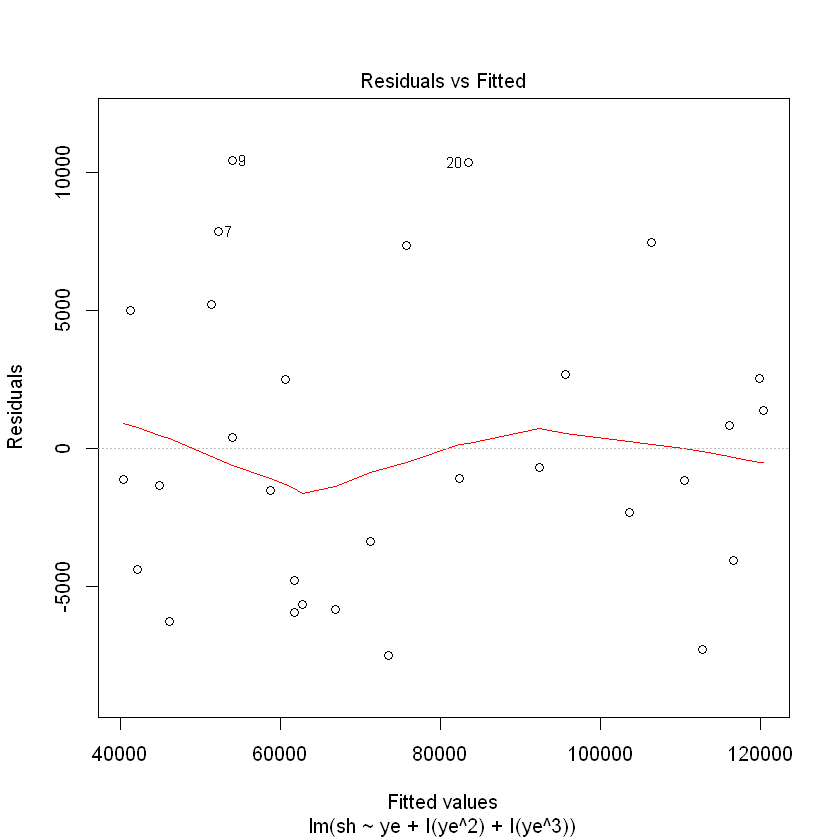

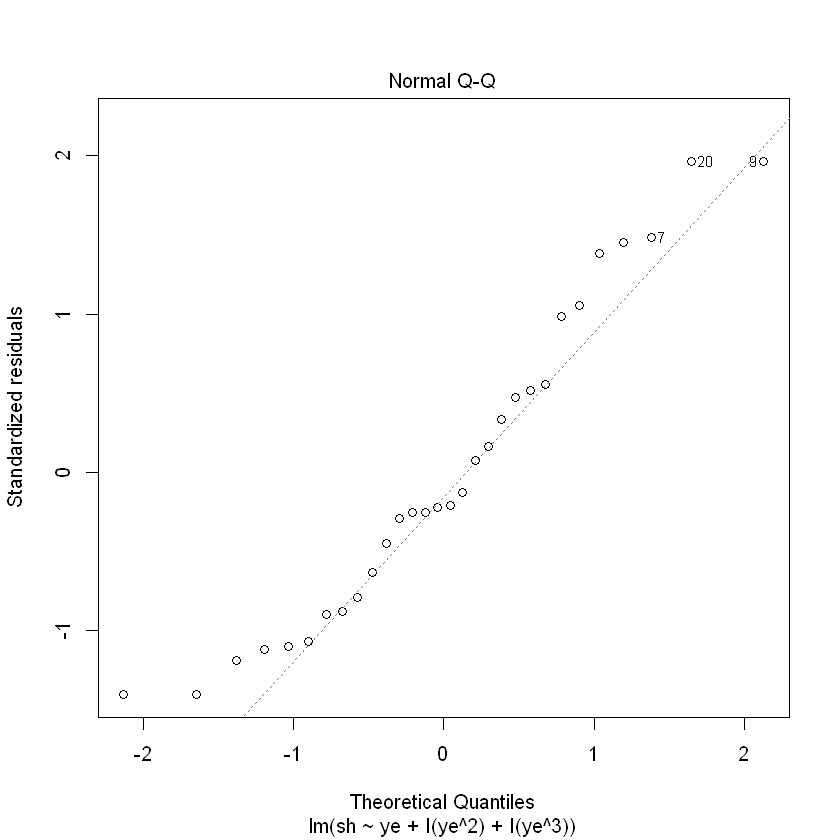

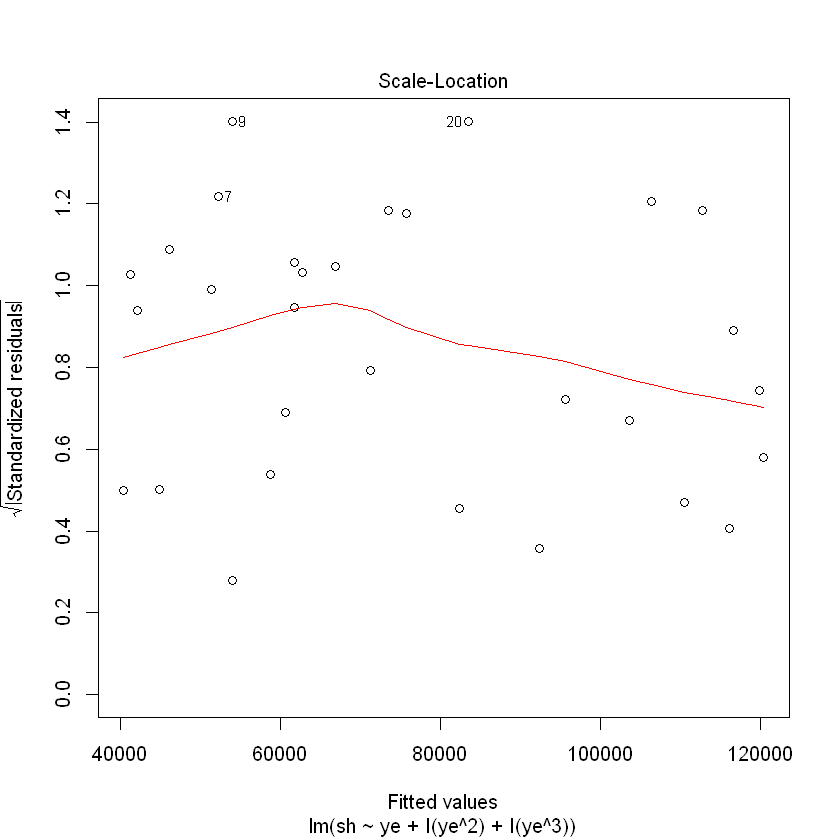

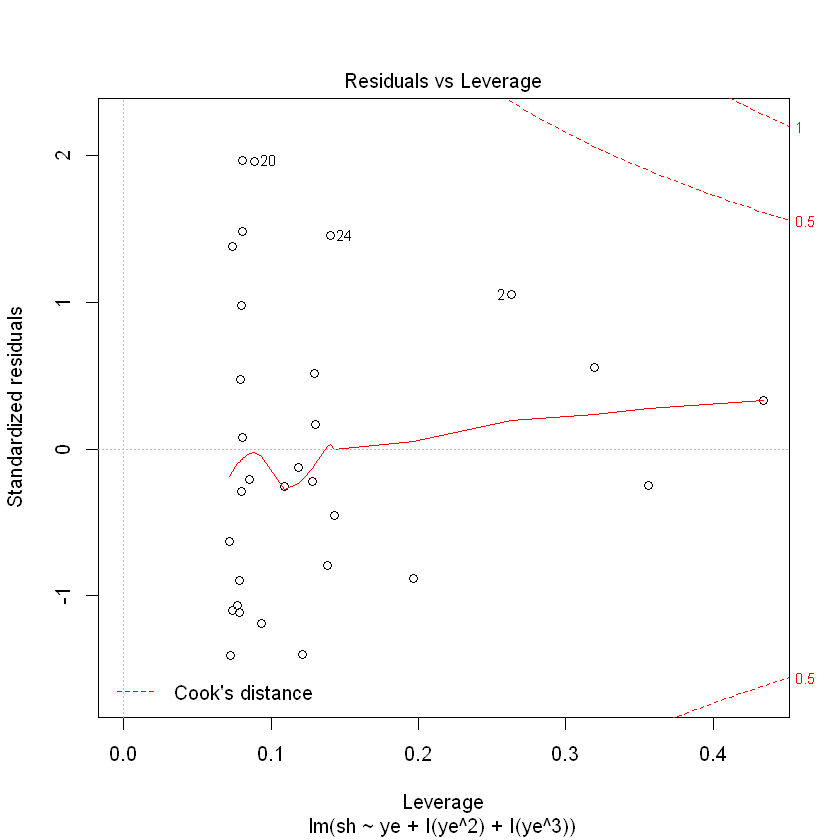

In [29]:
plot(poly_mod)


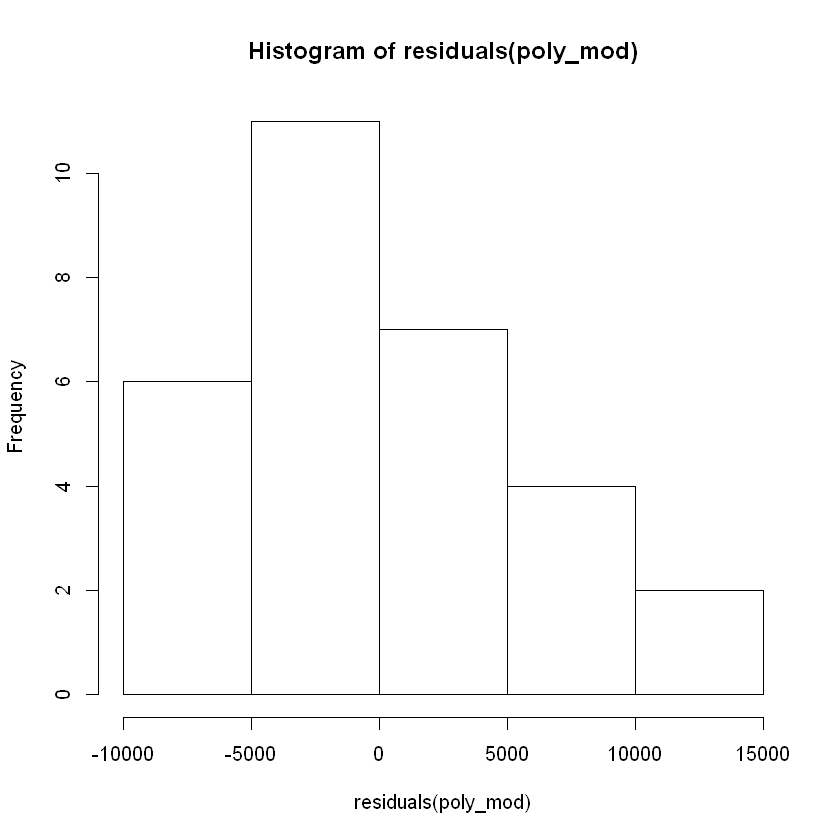

In [30]:
hist(residuals(poly_mod)) # close to normal distribution